# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Stock Prices Anomaly Detection

## Learning Objectives

At the end of the experiment, you will be able to :

* apply PCA based analysis on various stocks data
* analyze and create time series data
* implement LSTM auto-encoders
* detect the anomalies based on the loss


## Information

Autoencoder Neural Networks try to learn data representation of its input. Usually, we want to learn an efficient encoding that uses fewer parameters/memory. The encoding should allow for output similar to the original input. In a sense, we’re forcing the model to learn the most important features of the data using as few parameters as possible.

LSTM autoencoder is an encoder that makes use of LSTM encoder-decoder architecture to compress data using an encoder and decode it to retain original structure using a decoder.

**Anomaly Detection**

Anomaly detection refers to the task of finding/identifying rare events/data points. Some applications include - bank fraud detection, tumor detection in medical imaging, and errors in written text.

A lot of supervised and unsupervised approaches for anomaly detection have been proposed. Some of the approaches include - One-class SVMs, Bayesian Networks, Cluster analysis, and Neural Networks.

We will use an LSTM Autoencoder Neural Network to detect/predict anomalies (sudden price changes) in the S&P 500 index.

## Dataset



This mini-project consists of two parts and two different stock price datasets:

### PART A

Using the **S&P 500 stock prices data of different companies**, we will perform a PCA based analysis.

### PART B

Using the **S&P 500 stock price index time series data**, we will perform anomaly detection in the stock prices across the years. The dataset chosen is is S&P500 Daily Index a .csv format with one column with a daily timestamp and the second column with the raw, un-adjusted closing prices for each day. This long term, granular time series dataset allows researchers to have a good sized publicly available financial dataset to explore time series trends or use as part of a quantitative finance project.

## Problem Statement

Detect the stock price anomalies by implementing an LSTM autoencoder

## Grading = 20 Points

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title Download dataset
# !wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/SPY.csv -P /content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_4_Stock_Prices_Anomaly_Detection/
# !wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/prices.csv -P /content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_4_Stock_Prices_Anomaly_Detection

### Import required packages

In [3]:
import keras
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import LSTM, RepeatVector, TimeDistributed
from keras.layers import BatchNormalization
from keras.models import Sequential, Model
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
plt.style.use('fivethirtyeight')

## PCA Analysis (PART-A)

Principal Component Analysis (PCA) decomposes the data into many vectors called principal components. These summaries are linear combinations of the input features that try to explain as much variance in the data as possible. By convention, these principal components are ordered by the amount of variance they can explain, with the first principal component explaining most of the data.

Perform PCA based analytics on the stock prices data from different companies.

### Load and pre-process the prices data (2 points)

In [5]:
prices_path = "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_4_Stock_Prices_Anomaly_Detection/prices.csv"
SPY_path = "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_4_Stock_Prices_Anomaly_Detection/SPY.csv"

prices_dataframe=pd.read_csv(prices_path)



prices_dataframe_first_row_skipped=prices_dataframe.iloc[1:]

prices_dataframe_first_row_skipped.shape

(393, 503)

In [6]:
prices_dataframe_first_row_skipped

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1,85.017082,28.982893,157.171890,74.207466,81.950539,82.938141,168.809998,84.622925,204.910950,334.429993,...,59.934875,100.115349,63.633118,56.203197,78.396255,99.349007,147.579269,259.140015,49.903751,132.803421
2,83.652077,27.548195,157.181747,73.486023,81.172668,81.895088,166.820007,83.591301,204.569687,331.809998,...,60.223114,97.810677,63.121540,55.581242,78.857689,99.037834,147.193512,256.049988,49.199547,132.823227
3,83.899353,27.219410,154.598541,74.071579,81.813271,83.094116,179.039993,84.029251,203.233841,333.709991,...,60.136642,95.771927,63.606186,55.887280,78.347168,98.979500,146.342834,258.010010,48.600010,131.803482
4,84.156532,27.119778,152.764648,73.723213,81.346550,82.499466,180.350006,83.562103,198.846008,333.390015,...,60.011738,97.958405,63.085632,56.183449,78.052628,99.154533,146.214264,256.470001,48.305000,132.248978
5,84.987411,27.737495,151.009644,74.909149,81.923080,83.298828,178.690002,83.902740,199.236069,337.869995,...,59.954086,97.682640,62.134274,56.775787,78.317703,99.329567,147.965027,247.639999,48.780827,131.961884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,147.580002,18.969999,205.669998,142.449997,115.419998,112.599998,314.619995,118.790001,309.179993,602.049988,...,68.269997,129.330002,55.349998,60.689999,117.230003,113.449997,150.169998,506.910004,47.700001,197.580002
390,149.300003,20.559999,210.229996,146.149994,116.050003,116.489998,323.589996,118.730003,312.059998,608.719971,...,68.160004,131.100006,55.959999,62.580002,121.529999,116.160004,155.630005,519.669983,50.200001,200.110001
391,148.949997,21.400000,209.399994,145.399994,116.989998,118.220001,322.850006,118.980003,313.769989,612.260010,...,67.059998,135.330002,57.759998,63.759998,122.430000,116.769997,159.570007,533.770020,51.639999,198.039993
392,150.300003,21.160000,210.289993,146.800003,117.540001,119.839996,323.540009,118.250000,314.260010,623.679993,...,67.239998,136.470001,57.110001,63.299999,122.000000,120.260002,158.660004,536.219971,50.320000,200.539993


In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")

prices_dataframe_imputed=imputer.fit_transform(prices_dataframe_first_row_skipped.to_numpy())

In [8]:
# prompt: numpy to dataframe

prices_dataframe_imputed_df=pd.DataFrame(prices_dataframe_imputed,columns=prices_dataframe_first_row_skipped.columns)
prices_dataframe_imputed_df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,85.017082,28.982893,157.171890,74.207466,81.950539,82.938141,168.809998,84.622925,204.910950,334.429993,...,59.934875,100.115349,63.633118,56.203197,78.396255,99.349007,147.579269,259.140015,49.903751,132.803421
1,83.652077,27.548195,157.181747,73.486023,81.172668,81.895088,166.820007,83.591301,204.569687,331.809998,...,60.223114,97.810677,63.121540,55.581242,78.857689,99.037834,147.193512,256.049988,49.199547,132.823227
2,83.899353,27.219410,154.598541,74.071579,81.813271,83.094116,179.039993,84.029251,203.233841,333.709991,...,60.136642,95.771927,63.606186,55.887280,78.347168,98.979500,146.342834,258.010010,48.600010,131.803482
3,84.156532,27.119778,152.764648,73.723213,81.346550,82.499466,180.350006,83.562103,198.846008,333.390015,...,60.011738,97.958405,63.085632,56.183449,78.052628,99.154533,146.214264,256.470001,48.305000,132.248978
4,84.987411,27.737495,151.009644,74.909149,81.923080,83.298828,178.690002,83.902740,199.236069,337.869995,...,59.954086,97.682640,62.134274,56.775787,78.317703,99.329567,147.965027,247.639999,48.780827,131.961884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,147.580002,18.969999,205.669998,142.449997,115.419998,112.599998,314.619995,118.790001,309.179993,602.049988,...,68.269997,129.330002,55.349998,60.689999,117.230003,113.449997,150.169998,506.910004,47.700001,197.580002
389,149.300003,20.559999,210.229996,146.149994,116.050003,116.489998,323.589996,118.730003,312.059998,608.719971,...,68.160004,131.100006,55.959999,62.580002,121.529999,116.160004,155.630005,519.669983,50.200001,200.110001
390,148.949997,21.400000,209.399994,145.399994,116.989998,118.220001,322.850006,118.980003,313.769989,612.260010,...,67.059998,135.330002,57.759998,63.759998,122.430000,116.769997,159.570007,533.770020,51.639999,198.039993
391,150.300003,21.160000,210.289993,146.800003,117.540001,119.839996,323.540009,118.250000,314.260010,623.679993,...,67.239998,136.470001,57.110001,63.299999,122.000000,120.260002,158.660004,536.219971,50.320000,200.539993


In [9]:
# prompt: pandas parse date

# SPY_dataframe_Date['Date'] = pd.to_datetime(SPY_dataframe_Date.loc[:,('Date')])


In [10]:
# prompt: filter one dataframe from other dataframe  filter condition

# SPY_dataframe_data_imputed_filtered = SPY_dataframe_data_imputed[SPY_dataframe_Date['Year'] == 2020]
# SPY_dataframe_data_imputed_filtered

### Apply PCA (6 points)

* plot the explained variance ratio. Hint: `pca.explained_variance_ratio_`
* Represent the components which preserve maximum information and plot to visualize
* Compute the daily returns of the 500 company stocks.
* Plot the stocks with most negative and least negative PCA weights in the pandemic period (Year 2020). Use reference as above. Discuss the least and most impacted industrial sectors in terms of stocks.

In [11]:
pca = PCA(n_components = 20)
prices_dataframe_reduced=pca.fit_transform(prices_dataframe_imputed)
prices_dataframe_reduced.shape

(393, 20)

In [12]:
# Explained variance of first 10 principal components
pca.explained_variance_ratio_[0:10]

array([0.83586928, 0.08433361, 0.03143359, 0.0188145 , 0.00780102,
       0.00472947, 0.00306677, 0.00253683, 0.00164743, 0.00132057])

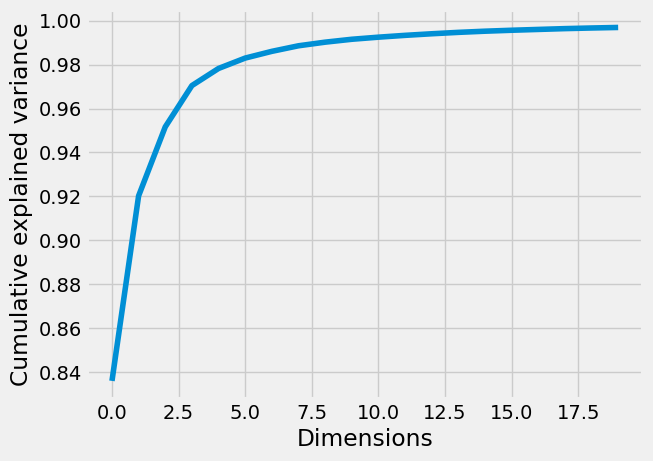

In [13]:
# Visualize Explained variance as a function of the number of dimensions
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Dimensions')
plt.ylabel('Cumulative explained variance');

In [14]:
SPY_dataframe=pd.read_csv(SPY_path,index_col=['Date'])
SPY_dataframe

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.983273,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,26.038315,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,26.313566,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.423655,531500
1993-02-05,44.968750,45.062500,44.718750,44.968750,26.405315,492100
...,...,...,...,...,...,...
2021-05-24,417.339996,420.320007,417.079987,419.170013,417.803131,51376700
2021-05-25,420.329987,420.709991,417.619995,418.239990,416.876160,57451400
2021-05-26,418.869995,419.609985,417.760010,419.070007,417.703461,43088600


In [15]:
prices=SPY_dataframe['Adj Close']

In [16]:
prices

Date
1993-02-01     25.983273
1993-02-02     26.038315
1993-02-03     26.313566
1993-02-04     26.423655
1993-02-05     26.405315
                 ...    
2021-05-24    417.803131
2021-05-25    416.876160
2021-05-26    417.703461
2021-05-27    417.922729
2021-05-28    418.670288
Name: Adj Close, Length: 7134, dtype: float64

In [17]:
rs = prices.apply(np.log).diff(1)

In [18]:
rs

Date
1993-02-01         NaN
1993-02-02    0.002116
1993-02-03    0.010516
1993-02-04    0.004175
1993-02-05   -0.000694
                ...   
2021-05-24    0.010143
2021-05-25   -0.002221
2021-05-26    0.001983
2021-05-27    0.000525
2021-05-28    0.001787
Name: Adj Close, Length: 7134, dtype: float64

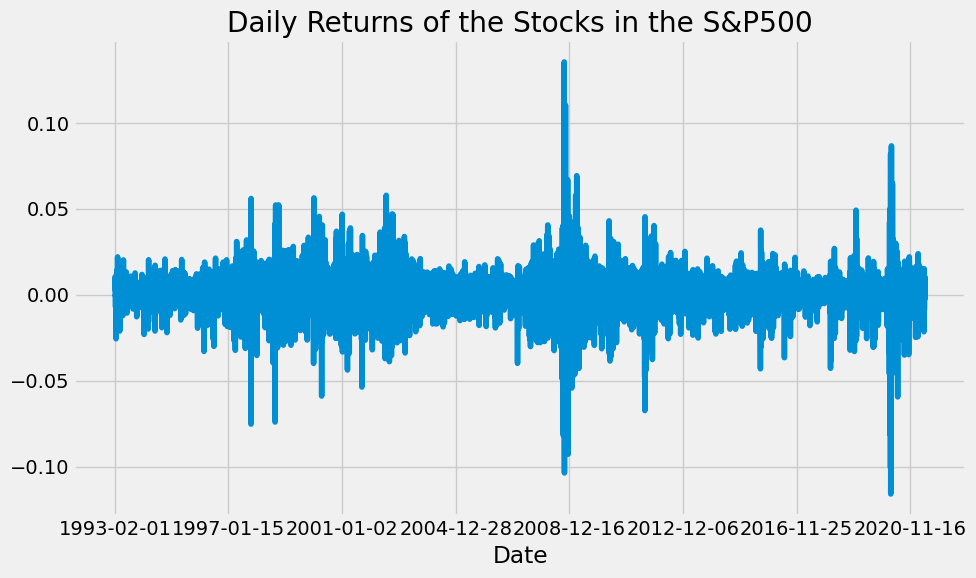

In [19]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

In [20]:
import requests
import bs4 as bs

In [21]:
# Scrap sp500 tickers
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))

    return tickers

tickers = save_sp500_tickers()

In [22]:
prices = yf.download(tickers, start='2020-01-01')['Adj Close']

[*********************100%%**********************]  501 of 501 completed


In [23]:
rs = prices.apply(np.log).diff(1)

In [24]:
rs

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.016186,-0.050769,-0.009770,-0.009537,NaN,-0.012266,-0.001153,-0.001667,-0.007865,-0.017760,...,-0.014944,0.004798,-0.008072,-0.011128,0.005869,-0.003137,-0.002617,-0.011996,-0.014212,0.000149
2020-01-06,0.002952,-0.012007,0.007937,0.007861,NaN,0.005226,0.003914,-0.006552,0.005710,-0.011818,...,-0.001981,-0.001437,0.007649,0.005491,-0.006495,-0.000589,-0.005796,0.007626,-0.012260,-0.007707
2020-01-07,0.003061,-0.003667,-0.004714,-0.005721,NaN,-0.005575,-0.008306,-0.021826,-0.000959,0.022496,...,0.004734,-0.002079,-0.008218,0.005285,-0.003767,0.001767,-0.000879,-0.005987,-0.006089,0.003374
2020-01-08,0.009825,0.022522,0.015958,0.007063,NaN,0.004068,-0.010013,0.001959,0.013348,0.008991,...,0.006254,-0.000961,-0.015195,0.010488,0.003390,0.001764,0.011903,-0.035036,0.009802,-0.002173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,-0.003619,-0.017316,-0.005439,0.001421,-0.006297,-0.002994,0.002832,-0.001936,0.001812,-0.008425,...,-0.007109,0.000323,-0.002098,0.000000,0.000350,0.001072,0.000575,-0.007363,-0.017848,0.001065
2024-01-02,-0.002016,-0.022076,-0.036443,0.030817,-0.012268,-0.002001,0.017088,-0.011436,-0.028098,-0.025400,...,0.037590,0.024886,0.023526,0.001123,-0.006052,-0.012554,-0.002550,-0.019767,0.006136,-0.004061
2024-01-03,-0.056256,-0.037140,-0.007516,0.003997,-0.007913,-0.003009,0.018231,-0.026285,-0.014377,-0.024155,...,-0.006044,0.001732,0.008367,-0.022996,-0.018737,0.000542,-0.007608,-0.059422,-0.049697,-0.018691


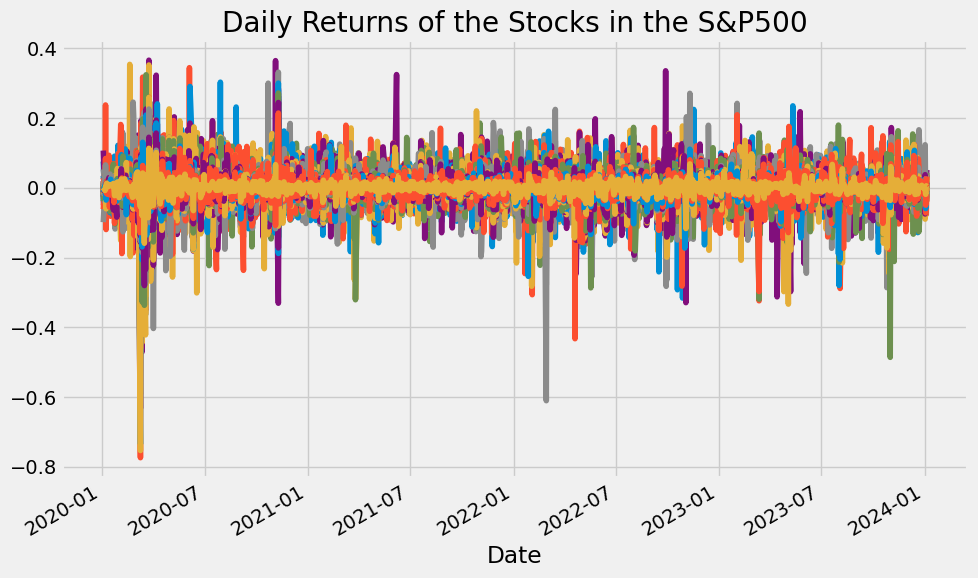

In [25]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

In [26]:
prices_dataframe_imputed

array([[ 85.01708221,  28.98289299, 157.17189026, ..., 259.14001465,
         49.90375137, 132.80342102],
       [ 83.65207672,  27.54819489, 157.18174744, ..., 256.04998779,
         49.19954681, 132.82322693],
       [ 83.89935303,  27.21940994, 154.59854126, ..., 258.01000977,
         48.60000992, 131.80348206],
       ...,
       [148.94999695,  21.39999962, 209.3999939 , ..., 533.77001953,
         51.63999939, 198.03999329],
       [150.30000305,  21.15999985, 210.28999329, ..., 536.2199707 ,
         50.31999969, 200.53999329],
       [152.30999756,  21.20000076, 214.94999695, ..., 548.60998535,
         50.86000061, 203.58999634]])

In [27]:
pca = PCA(1).fit(prices_dataframe_imputed)

In [28]:
pca.components_[0]

array([-1.77185690e-02, -1.87678780e-03, -2.12195234e-02, -1.84812367e-02,
       -9.66532224e-03, -8.38907433e-03, -4.08309583e-02, -1.03378156e-02,
       -3.12750633e-02, -5.21233954e-02, -1.74204268e-02, -7.38658355e-03,
       -1.51775794e-02, -3.28837102e-02, -2.55421489e-03, -5.60356340e-04,
       -3.83358559e-03, -4.79715329e-03, -5.22500437e-03, -1.37089711e-02,
       -1.48613818e-02, -4.03648720e-03, -3.04122281e-02, -1.16674997e-01,
       -7.91714026e-03, -8.48091514e-03, -8.69469946e-03, -2.34337298e-02,
       -9.23646219e-04, -1.08989833e-02, -1.51047739e-02, -8.30611794e-03,
       -3.61423429e-02, -4.85075979e-03, -3.56715691e-01, -3.90225113e-02,
       -2.96629314e-02, -3.41795512e-02, -1.50776878e-02, -7.96908525e-03,
       -1.77576354e-03, -2.02145126e-02, -7.41557676e-03, -2.51400916e-02,
       -9.40334394e-03,  1.02602269e-03, -9.33066543e-03, -1.02840829e-02,
       -6.46974424e-02, -2.77311622e-02, -1.02307288e-02, -1.75830385e-02,
       -1.20221207e-01, -

In [29]:
prices_dataframe_imputed_df_log_ret = prices_dataframe_imputed_df.apply(np.log).diff(1)

In [30]:
prices_dataframe_imputed_df_log_ret

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.016186,-0.050769,0.000063,-0.009770,-0.009537,-0.012656,-0.011858,-0.012266,-0.001667,-0.007865,...,0.004798,-0.023289,-0.008072,-0.011128,0.005869,-0.003137,-0.002617,-0.011996,-0.014212,0.000149
2,0.002952,-0.012007,-0.016571,0.007937,0.007861,0.014535,0.070694,0.005226,-0.006551,0.005710,...,-0.001437,-0.021064,0.007649,0.005491,-0.006495,-0.000589,-0.005796,0.007626,-0.012261,-0.007707
3,0.003061,-0.003667,-0.011933,-0.004714,-0.005721,-0.007182,0.007290,-0.005575,-0.021827,-0.000959,...,-0.002079,0.022573,-0.008218,0.005285,-0.003767,0.001767,-0.000879,-0.005987,-0.006089,0.003374
4,0.009825,0.022522,-0.011555,0.015958,0.007062,0.009643,-0.009247,0.004068,0.001960,0.013348,...,-0.000961,-0.002819,-0.015195,0.010488,0.003390,0.001764,0.011903,-0.035036,0.009802,-0.002173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,-0.009106,-0.042318,-0.000875,-0.027283,-0.017861,-0.002484,-0.010623,0.010834,-0.008791,-0.006704,...,-0.012518,0.005427,-0.034973,-0.007714,-0.018006,-0.020934,-0.021281,-0.022279,-0.039059,-0.009308
389,0.011587,0.080489,0.021929,0.025642,0.005444,0.033964,0.028112,-0.000505,0.009272,0.011018,...,-0.001612,0.013593,0.010961,0.030667,0.036023,0.023606,0.035713,0.024860,0.051084,0.012724
390,-0.002347,0.040043,-0.003956,-0.005145,0.008067,0.014742,-0.002289,0.002103,0.005465,0.005799,...,-0.016270,0.031756,0.031659,0.018680,0.007378,0.005238,0.025001,0.026771,0.028282,-0.010398
391,0.009023,-0.011278,0.004241,0.009583,0.004690,0.013610,0.002135,-0.006154,0.001561,0.018480,...,0.002681,0.008389,-0.011317,-0.007241,-0.003518,0.029450,-0.005719,0.004579,-0.025894,0.012545


In [31]:
pca = PCA(1).fit(prices_dataframe_imputed)

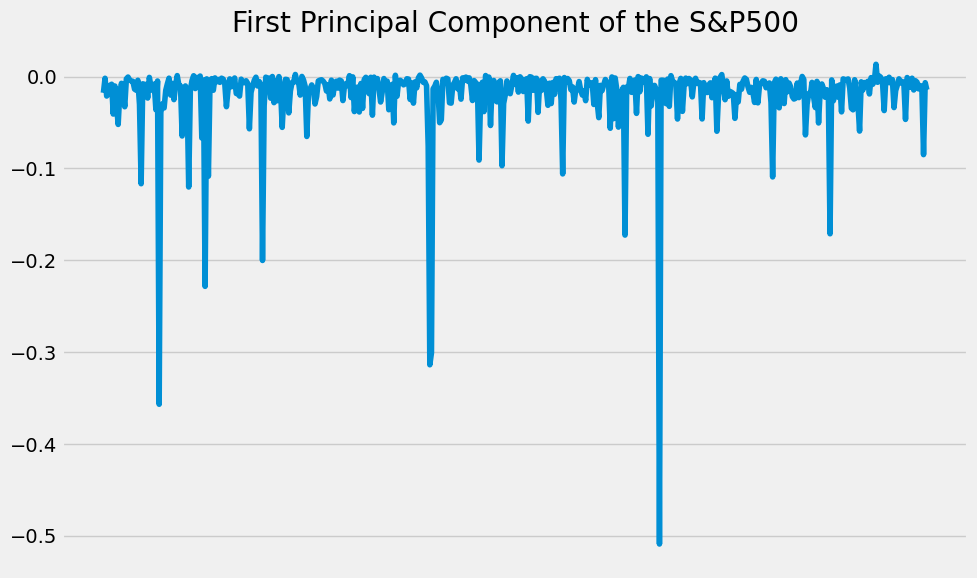

In [32]:
pc1 = pd.Series(index=prices_dataframe_imputed_df_log_ret.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

In [33]:
# SPY_dataframe_data.loc[:,('Open')]

In [34]:
# SPY_dataframe_data['Daily Returns']=SPY_dataframe_data['Open']-SPY_dataframe_data['Close']

In [35]:
# SPY_dataframe_data

In [36]:
# SPY_dataframe_data = SPY_dataframe_data[SPY_dataframe_Date['Year'] == 2020]
# SPY_dataframe_data

#### Apply T-SNE and visualize with a graph (2 points)

In [37]:
from sklearn.manifold import TSNE
import seaborn as sns

In [38]:
# Instantiate tsne from sklearn
tsne = TSNE()

# Implement tsne
X_embedded = tsne.fit_transform(prices_dataframe_imputed)

X_embedded

array([[  7.206047  ,  16.971031  ],
       [  7.4762416 ,  16.880548  ],
       [  7.9088006 ,  17.00605   ],
       [  7.920886  ,  17.094265  ],
       [  7.8172426 ,  17.216393  ],
       [  7.179657  ,  17.474686  ],
       [  7.252806  ,  17.679811  ],
       [  7.4133453 ,  17.911324  ],
       [  7.7927213 ,  17.666098  ],
       [  7.9508877 ,  18.01088   ],
       [  7.7518263 ,  18.244015  ],
       [  7.7390075 ,  18.536577  ],
       [  8.273215  ,  18.426685  ],
       [  8.232707  ,  18.670832  ],
       [  8.420701  ,  19.016981  ],
       [  8.627821  ,  18.569782  ],
       [  8.85268   ,  17.859049  ],
       [  8.889526  ,  18.499033  ],
       [  9.024012  ,  17.880386  ],
       [  9.22976   ,  18.046915  ],
       [ 10.088422  ,  17.65012   ],
       [ 10.100977  ,  17.84341   ],
       [ 10.21345   ,  18.04975   ],
       [  9.912991  ,  18.500486  ],
       [  9.930637  ,  18.856367  ],
       [ 10.288071  ,  18.793407  ],
       [ 10.562848  ,  19.068974  ],
 

In [39]:
X_embedded[:,1]

array([ 16.971031  ,  16.880548  ,  17.00605   ,  17.094265  ,
        17.216393  ,  17.474686  ,  17.679811  ,  17.911324  ,
        17.666098  ,  18.01088   ,  18.244015  ,  18.536577  ,
        18.426685  ,  18.670832  ,  19.016981  ,  18.569782  ,
        17.859049  ,  18.499033  ,  17.880386  ,  18.046915  ,
        17.65012   ,  17.84341   ,  18.04975   ,  18.500486  ,
        18.856367  ,  18.793407  ,  19.068974  ,  19.306114  ,
        19.65945   ,  19.859922  ,  19.940868  ,  19.818552  ,
        20.044714  ,  19.946083  ,  19.398954  ,  17.87787   ,
        16.8337    ,  16.679014  ,  15.807576  ,  15.647775  ,
        16.345484  ,  16.160479  ,  17.07432   ,  16.314976  ,
        15.877104  ,  14.979862  ,  15.389751  ,  14.618577  ,
         6.2247353 ,   5.5558357 ,   6.788866  ,   6.260258  ,
         6.5913787 ,   6.4278817 ,   6.809622  ,   6.929269  ,
         6.129873  ,   5.915757  ,   5.2544804 ,   5.735885  ,
         5.330639  ,   5.4874945 ,   6.0706058 ,   5.85

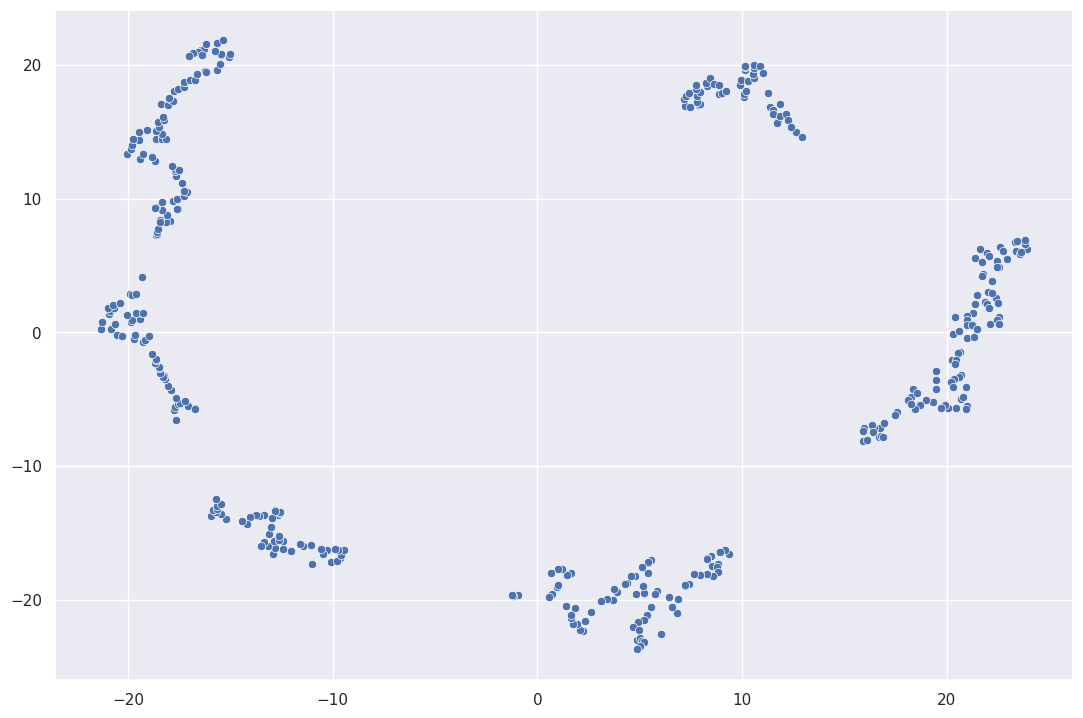

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# palette = sns.color_palette("bright", 10)

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1],  legend='full')
plt.show()

## Anomaly Detection (PART-B)

### Load and Preprocess the data

* Inspect the S&P 500 Index Data

In [98]:
SPY_dataframe=pd.read_csv(SPY_path,index_col=['Date'])
SPY_dataframe

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.983273,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,26.038315,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,26.313566,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.423655,531500
1993-02-05,44.968750,45.062500,44.718750,44.968750,26.405315,492100
...,...,...,...,...,...,...
2021-05-24,417.339996,420.320007,417.079987,419.170013,417.803131,51376700
2021-05-25,420.329987,420.709991,417.619995,418.239990,416.876160,57451400
2021-05-26,418.869995,419.609985,417.760010,419.070007,417.703461,43088600


In [106]:
# prompt: pandas change index type to datetime

SPY_dataframe.index = pd.to_datetime(SPY_dataframe.index)


In [107]:
# SPY_dataframe_Date=SPY_dataframe.index
SPY_dataframe_data=SPY_dataframe[['Open','High','Low','Close','Adj Close','Volume']]
imputer_SPY = KNNImputer(n_neighbors=2, weights="uniform")

SPY_dataframe_data_imputed=imputer_SPY.fit_transform(SPY_dataframe_data.to_numpy())

In [43]:
path = 'SPY.csv'

In [108]:
SPY_dataframe_data_imputed

array([[4.39687500e+01, 4.42500000e+01, 4.39687500e+01, 4.42500000e+01,
        2.59832726e+01, 4.80500000e+05],
       [4.42187500e+01, 4.43750000e+01, 4.41250000e+01, 4.43437500e+01,
        2.60383148e+01, 2.01300000e+05],
       [4.44062500e+01, 4.48437500e+01, 4.43750000e+01, 4.48125000e+01,
        2.63135662e+01, 5.29400000e+05],
       ...,
       [4.18869995e+02, 4.19609985e+02, 4.17760010e+02, 4.19070007e+02,
        4.17703461e+02, 4.30886000e+07],
       [4.20170013e+02, 4.20720001e+02, 4.18989990e+02, 4.19290009e+02,
        4.17922729e+02, 5.67077000e+07],
       [4.20970001e+02, 4.21250000e+02, 4.19790009e+02, 4.20040009e+02,
        4.18670288e+02, 5.85202000e+07]])

In [45]:
# SPY_dataframe_Date=SPY_dataframe[['Date']]
# SPY_dataframe_data=SPY_dataframe[['Open','High','Low','Close','Adj Close','Volume']]
# imputer_SPY = KNNImputer(n_neighbors=2, weights="uniform")

# SPY_dataframe_data_imputed=imputer_SPY.fit_transform(SPY_dataframe_data.to_numpy())
# SPY_dataframe_data_imputed

In [46]:
# SPY_dataframe_Date.dtypes

Date    object
dtype: object

In [109]:
# prompt: create dataframe using np array

SPY_dataframe_data_imputed = pd.DataFrame(data=SPY_dataframe_data_imputed, columns=['Open','High','Low','Close','Adj Close','Volume'],index=SPY_dataframe_data.index)
SPY_dataframe_data_imputed

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.983273,480500.0
1993-02-02,44.218750,44.375000,44.125000,44.343750,26.038315,201300.0
1993-02-03,44.406250,44.843750,44.375000,44.812500,26.313566,529400.0
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.423655,531500.0
1993-02-05,44.968750,45.062500,44.718750,44.968750,26.405315,492100.0
...,...,...,...,...,...,...
2021-05-24,417.339996,420.320007,417.079987,419.170013,417.803131,51376700.0
2021-05-25,420.329987,420.709991,417.619995,418.239990,416.876160,57451400.0
2021-05-26,418.869995,419.609985,417.760010,419.070007,417.703461,43088600.0


In [105]:
# SPY_dataframe_Date = pd.to_datetime(SPY_dataframe_Date.loc[:,('Date')])

AttributeError: ignored

In [49]:
# SPY_dataframe_Date.dtypes

Date    datetime64[ns]
dtype: object

#### Data Preprocessing (1 point)

In [50]:
# YOUR CODE HERE

In [111]:
# prompt: concatenate dataframe on columns

# SPY_dataframe_processed = pd.concat([SPY_dataframe_Date, SPY_dataframe_data_imputed], axis=1)
SPY_dataframe_processed=SPY_dataframe_data_imputed

In [112]:
train_size=int(len(SPY_dataframe_processed)*0.95)
test_size=len(SPY_dataframe_processed)-train_size
train_size,test_size

(6777, 357)

In [116]:
train,test=SPY_dataframe_processed.iloc[:train_size],SPY_dataframe_processed.iloc[train_size:]
train.shape,test.shape

((6777, 6), (357, 6))

In [117]:
from sklearn.preprocessing import RobustScaler

In [118]:
train_scaled=train.copy(deep=True)
test_scaled=test.copy(deep=True)

In [119]:
# data standardization
robust = RobustScaler(quantile_range=(25, 75)).fit(train[['Open','High','Low','Close','Adj Close','Volume']])
train_scaled[['Open','High','Low','Close','Adj Close','Volume']] = robust.transform(train[['Open','High','Low','Close','Adj Close','Volume']])
test_scaled[['Open','High','Low','Close','Adj Close','Volume']] = robust.transform(test[['Open','High','Low','Close','Adj Close','Volume']])

In [120]:
train_scaled

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,-1.394660,-1.416896,-1.373579,-1.390516,-1.024920,-0.495603
1993-02-02,-1.390390,-1.414741,-1.370914,-1.388911,-1.024057,-0.498049
1993-02-03,-1.387189,-1.406659,-1.366650,-1.380890,-1.019742,-0.495175
1993-02-04,-1.377583,-1.402349,-1.365051,-1.377682,-1.018016,-0.495156
1993-02-05,-1.377583,-1.402888,-1.360787,-1.378217,-1.018304,-0.495502
...,...,...,...,...,...,...
2019-12-20,3.326845,3.371379,3.324137,3.340592,3.471271,0.789212
2019-12-23,3.346141,3.365862,3.352621,3.348976,3.478762,-0.035599
2019-12-24,3.344092,3.363620,3.349892,3.349148,3.478915,-0.322239


In [124]:
test_scaled

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-30,3.369366,3.390862,3.343922,3.346580,3.476622,-0.064166
2019-12-31,3.328040,3.374138,3.337100,3.359928,3.488546,0.000208
2020-01-02,3.379441,3.421724,3.377694,3.411435,3.534565,0.018376
2020-01-03,3.338798,3.400172,3.353304,3.369340,3.496956,0.180956
2020-01-06,3.327357,3.401724,3.340681,3.390388,3.515761,-0.012262
...,...,...,...,...,...,...
2021-05-24,4.981217,5.067068,4.990384,5.025090,5.117339,-0.049732
2021-05-25,5.032275,5.073792,4.999595,5.009176,5.102808,0.003485
2021-05-26,5.007344,5.054827,5.001983,5.023379,5.115777,-0.122339


### Create time series data ( 1 point)

Select the variable (column) from the data and create the series of data with a window size.

Refer [LSTM Autoencoder](https://medium.com/swlh/time-series-anomaly-detection-with-lstm-autoencoders-7bac1305e713)

In [59]:
train_scaled.shape

(6777, 7)

In [60]:
6777-30

6747

In [92]:
# helper function
def create_dataset(X, y, time_steps=1):
  a, b = [], []
  for i in range(len(X) - time_steps):
     v = X.iloc[i:(i + time_steps)].values
     a.append(v)
     b.append(y.iloc[i + time_steps])
  return np.array(a), np.array(b)
# We’ll create sequences with 30 days of historical data
n_steps = 30
# reshape to 3D [n_samples, n_steps, n_features]
X_train, y_train = create_dataset(train_scaled[['Close']], train_scaled[['Close']], n_steps)
X_test, y_test = create_dataset(test_scaled[['Close']], test_scaled[['Close']], n_steps)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (6747, 30, 1)
X_test shape: (327, 30, 1)
y_train shape: (6747, 1)
y_test shape: (327, 1)


In [62]:
X_train[0].shape

(30, 1)

### Build an LSTM Autoencoder ( 2 points)

Autoencoder should take a sequence as input and outputs a sequence of the same shape.

Hint: [LSTM Autoencoder](https://medium.com/swlh/time-series-anomaly-detection-with-lstm-autoencoders-7bac1305e713)

In [63]:
# units=64; dropout=0.2;  loss='mae'; epoch=30;learning_rate = 0.00001
# optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# model=keras.Sequential()
# model.add(keras.layers.LSTM(units=units,input_shape=(X_train.shape[1],X_train.shape[2])))
# model.add(keras.layers.Dropout(rate=dropout))
# model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
# model.add(keras.layers.LSTM(units=units,return_sequences=True))
# model.add(keras.layers.Dropout(rate=dropout))
# model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))

# model.compile(loss=loss,optimizer=optimizer)

# history =model.fit(X_train,y_train,epochs=epoch,batch_size=32,validation_split=0.1,shuffle=False)

Epoch 1/30
190/190 [==============================] - 12s 39ms/step - loss: 0.5516 - val_loss: 2.6159
Epoch 2/30
190/190 [==============================] - 9s 48ms/step - loss: 0.4759 - val_loss: 2.3147
Epoch 3/30
190/190 [==============================] - 6s 34ms/step - loss: 0.3758 - val_loss: 1.9105
Epoch 4/30
190/190 [==============================] - 9s 47ms/step - loss: 0.2252 - val_loss: 1.3928
Epoch 5/30
190/190 [==============================] - 6s 34ms/step - loss: 0.1412 - val_loss: 1.1217
Epoch 6/30
190/190 [==============================] - 11s 59ms/step - loss: 0.1316 - val_loss: 1.0138
Epoch 7/30
190/190 [==============================] - 7s 34ms/step - loss: 0.1273 - val_loss: 0.9557
Epoch 8/30
190/190 [==============================] - 9s 48ms/step - loss: 0.1239 - val_loss: 0.9111
Epoch 9/30
190/190 [==============================] - 7s 34ms/step - loss: 0.1207 - val_loss: 0.8670
Epoch 10/30
190/190 [==============================] - 9s 47ms/step - loss: 0.1173 - val_

In [93]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64,
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')


history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/10
190/190 [==============================] - 14s 38ms/step - loss: 0.1645 - val_loss: 0.2874
Epoch 2/10
190/190 [==============================] - 9s 47ms/step - loss: 0.0849 - val_loss: 0.1484
Epoch 3/10
190/190 [==============================] - 6s 34ms/step - loss: 0.0923 - val_loss: 0.1292
Epoch 4/10
190/190 [==============================] - 9s 48ms/step - loss: 0.0707 - val_loss: 0.0994
Epoch 5/10
190/190 [==============================] - 7s 36ms/step - loss: 0.0660 - val_loss: 0.2578
Epoch 6/10
190/190 [==============================] - 10s 55ms/step - loss: 0.0625 - val_loss: 0.2149
Epoch 7/10
190/190 [==============================] - 7s 35ms/step - loss: 0.0614 - val_loss: 0.1982
Epoch 8/10
190/190 [==============================] - 9s 48ms/step - loss: 0.0636 - val_loss: 0.2752
Epoch 9/10
190/190 [==============================] - 7s 35ms/step - loss: 0.0630 - val_loss: 0.4278
Epoch 10/10
190/190 [==============================] - 9s 48ms/step - loss: 0.0611 - val_

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 repeat_vector (RepeatVecto  (None, 30, 64)            0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 time_distributed (TimeDist  (None, 30, 1)             65        
 ributed)                                               

### Train the Autoencoder (1 point)

* Compile and fit the model with required parameters

In [65]:
# YOUR CODE HERE

#### Plot metrics and evaluate the model (2 point)

In [83]:
history.history

{'loss': [0.5516449213027954,
  0.47593048214912415,
  0.37576600909233093,
  0.2251657247543335,
  0.1411520391702652,
  0.13163571059703827,
  0.12730740010738373,
  0.12390992790460587,
  0.12071861326694489,
  0.11725663393735886,
  0.11387430131435394,
  0.11216679215431213,
  0.1085367426276207,
  0.10552941262722015,
  0.10290268063545227,
  0.1015927791595459,
  0.09870867431163788,
  0.09745374321937561,
  0.09497053921222687,
  0.09360340982675552,
  0.09241966903209686,
  0.09031873941421509,
  0.08955703675746918,
  0.0876481905579567,
  0.08620841056108475,
  0.08491509407758713,
  0.08430153876543045,
  0.08318083733320236,
  0.08233900368213654,
  0.08174508064985275],
 'val_loss': [2.6158788204193115,
  2.314743757247925,
  1.9104971885681152,
  1.3928340673446655,
  1.1216847896575928,
  1.0137585401535034,
  0.9557157158851624,
  0.9110562205314636,
  0.8670119643211365,
  0.8270730972290039,
  0.8116138577461243,
  0.7819613814353943,
  0.7601953148841858,
  0.739222

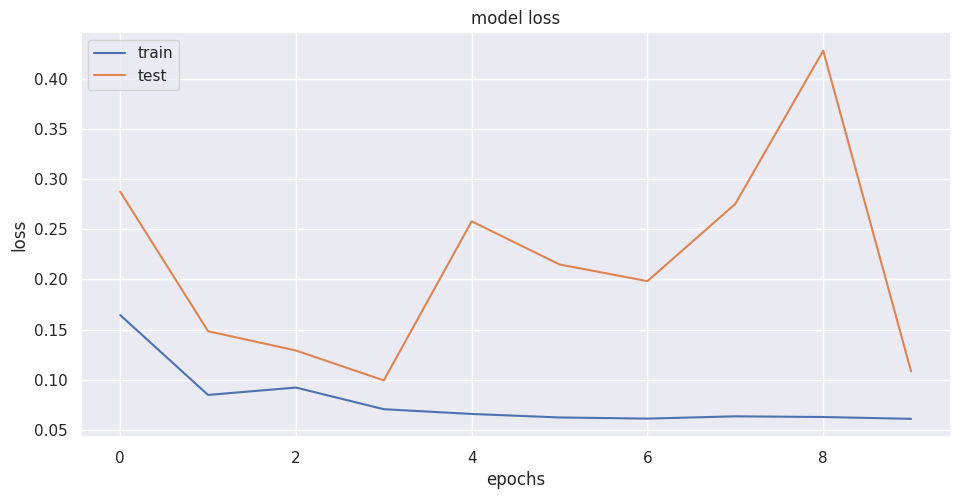

In [122]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

11/11 [==============================] - 1s 11ms/step
Testing loss: 0.6371150325613711



<ipython-input-95-bbc13c3b8369>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_loss, bins=50, kde=True)


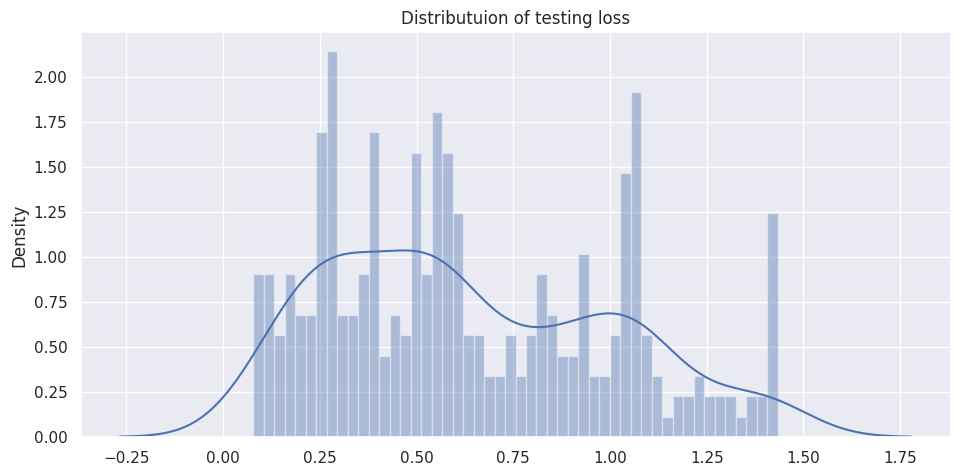

In [95]:
test_pred = model.predict(X_test)
test_loss=(np.mean(np.abs(test_pred - X_test),axis=1))
avg_loss = test_loss.mean()
print('Testing loss:' , avg_loss); print()
plt.figure(figsize =(10,5))
sns.distplot(test_loss, bins=50, kde=True)
plt.title( 'Distributuion of testing loss')
plt. show()

In [69]:
from sklearn.metrics import mean_squared_error
import math

In [70]:
y_pred_train = model.predict(X_train)
print('Predict shape:', y_pred_train.shape); print();

211/211 [==============================] - 3s 15ms/step
Predict shape: (6747, 30, 1)



In [71]:
y_train

array([[-1.0151395 ],
       [-1.0177286 ],
       [-1.0151395 ],
       ...,
       [ 3.47891455],
       [ 3.50505819],
       [ 3.5038354 ]])

In [72]:
X_test.shape

(327, 30, 1)

In [130]:
THRESHOLD = 0.95
TIME_STEPS=30

In [125]:
test_scaled[TIME_STEPS:].index

DatetimeIndex(['2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26',
               ...
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28'],
              dtype='datetime64[ns]', name='Date', length=327, freq=None)

In [132]:
test_score_df = pd.DataFrame(index=test_scaled[TIME_STEPS:].index)
test_score_df['loss'] = test_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['close'] = test_scaled[TIME_STEPS:].Close

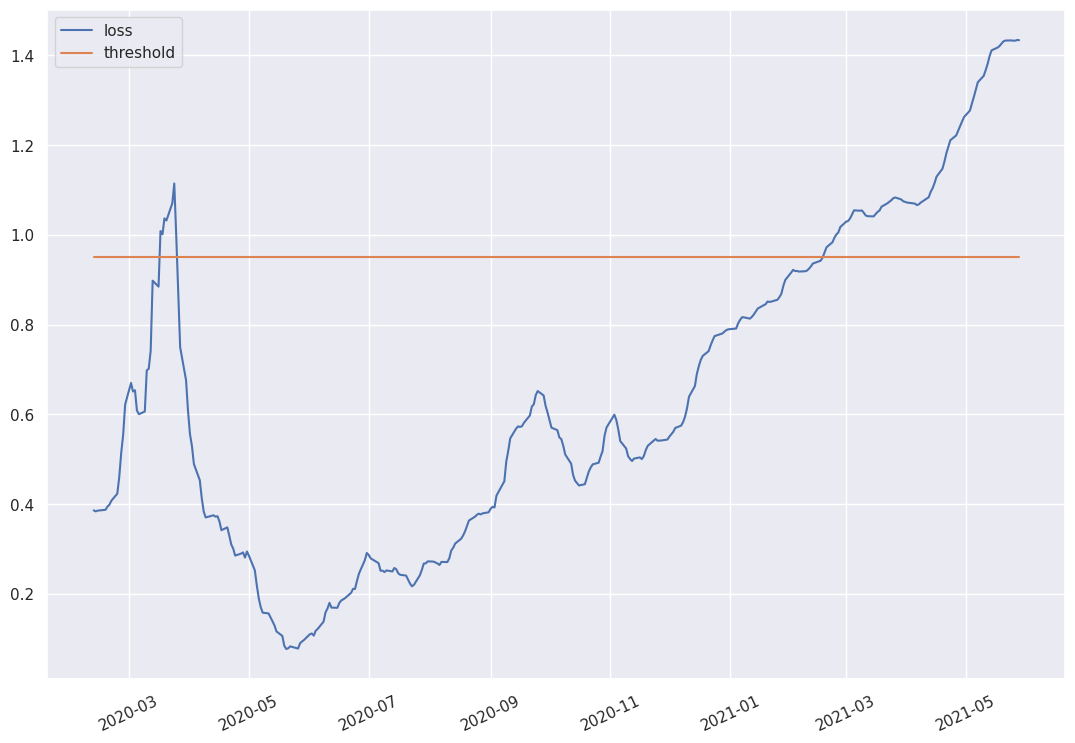

In [133]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [73]:
# MAE on the test data:
y_pred = model.predict(X_test)
print('Predict shape:', y_pred.shape); print();
print('Predict one value:',y_pred[:,0,:].shape)
# mae = np.mean(np.abs(y_pred - y_test), axis=1)
# reshaping prediction

print('y_pred.shape',y_pred.shape)
print('y_test.shape',y_test.shape)
pred_reshape = y_pred.reshape((y_pred.shape[0] * y_pred.shape[1]), y_pred.shape[2])
print('Prediction:', pred_reshape.shape); print();
# print('Test data shape:', X_test.shape); print();
# # reshaping test data
# y_test_reshaped = X_test.reshape((X_test.shape[0] * X_test.shape[1]), X_test.shape[2])
# print('Test data:', y_test_reshaped.shape); print();
# print('pred_reshape data:', pred_reshape.shape); print();
# # error computation
errors = y_test - y_pred[:,1,:]
print('Error:', errors.shape); print();
# rmse on test data
RMSE = math.sqrt(mean_squared_error(y_test, y_pred[:,0,:]))
print('Test RMSE: %.3f' % RMSE);




11/11 [==============================] - 0s 11ms/step
Predict shape: (327, 30, 1)

Predict one value: (327, 1)
y_pred.shape (327, 30, 1)
y_test.shape (327, 1)
Error: (327, 1)

Test RMSE: 3.127


In [74]:
test_mae_loss = np.mean(np.abs(y_pred - X_test), axis=1)
test_mae_loss.shape

(327, 1)

In [75]:
y_train

array([[-1.0151395 ],
       [-1.0177286 ],
       [-1.0151395 ],
       ...,
       [ 3.47891455],
       [ 3.50505819],
       [ 3.5038354 ]])

In [76]:
y_pred

array([[[0.8499821 ],
        [1.4627681 ],
        [1.8795497 ],
        ...,
        [2.6138387 ],
        [2.6136365 ],
        [2.613477  ]],

       [[0.85095096],
        [1.4643997 ],
        [1.8815888 ],
        ...,
        [2.6168427 ],
        [2.6166425 ],
        [2.6164846 ]],

       [[0.851843  ],
        [1.4658946 ],
        [1.8834472 ],
        ...,
        [2.6195638 ],
        [2.6193647 ],
        [2.6192079 ]],

       ...,

       [[0.91484773],
        [1.5707179 ],
        [2.013095  ],
        ...,
        [2.810542  ],
        [2.810443  ],
        [2.8103685 ]],

       [[0.91494066],
        [1.5708728 ],
        [2.013287  ],
        ...,
        [2.8108597 ],
        [2.8107612 ],
        [2.8106873 ]],

       [[0.91506004],
        [1.5710733 ],
        [2.013537  ],
        ...,
        [2.8112712 ],
        [2.811173  ],
        [2.8110993 ]]], dtype=float32)

In [77]:
y_pred[:,1,:]

array([[1.4627681],
       [1.4643997],
       [1.4658946],
       [1.4673011],
       [1.4684489],
       [1.4696919],
       [1.4706395],
       [1.4708393],
       [1.4689467],
       [1.4648896],
       [1.460447 ],
       [1.4532642],
       [1.4456265],
       [1.4414196],
       [1.4359958],
       [1.4336267],
       [1.4296463],
       [1.4244204],
       [1.4133427],
       [1.406104 ],
       [1.3959432],
       [1.3773682],
       [1.3661442],
       [1.345949 ],
       [1.330795 ],
       [1.3121493],
       [1.2945299],
       [1.2736993],
       [1.2512118],
       [1.239896 ],
       [1.2322708],
       [1.2324009],
       [1.2301147],
       [1.2318006],
       [1.232377 ],
       [1.2279168],
       [1.2260696],
       [1.2231299],
       [1.2278194],
       [1.2330815],
       [1.2417247],
       [1.2517793],
       [1.2601676],
       [1.2707067],
       [1.278387 ],
       [1.2854666],
       [1.29455  ],
       [1.3012092],
       [1.3039653],
       [1.3079993],


In [78]:
y_test

array([[3.72643712],
       [3.72093313],
       [3.72918984],
       [3.71588839],
       [3.74050258],
       [3.7192525 ],
       [3.66620074],
       [3.49710908],
       [3.34773853],
       [3.33015731],
       [3.11626965],
       [3.09715946],
       [3.29331137],
       [3.15800771],
       [3.35094908],
       [3.19194785],
       [3.11550517],
       [2.76035154],
       [2.97729618],
       [2.76233882],
       [2.36101308],
       [2.68528474],
       [2.23472942],
       [2.43271648],
       [2.23702264],
       [2.24481985],
       [2.08635992],
       [1.99639573],
       [2.30704111],
       [2.36301901],
       [2.58462351],
       [2.46497814],
       [2.5915431 ],
       [2.53156744],
       [2.35317663],
       [2.44052637],
       [2.38454895],
       [2.64090782],
       [2.64506082],
       [2.78192933],
       [2.84605797],
       [2.80699608],
       [2.93202322],
       [2.839291  ],
       [2.85989858],
       [2.97585189],
       [2.89819072],
       [2.766

11/11 [==============================] - 0s 12ms/step


<ipython-input-79-64607ac9826f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_mae_loss, bins=50, kde=True);


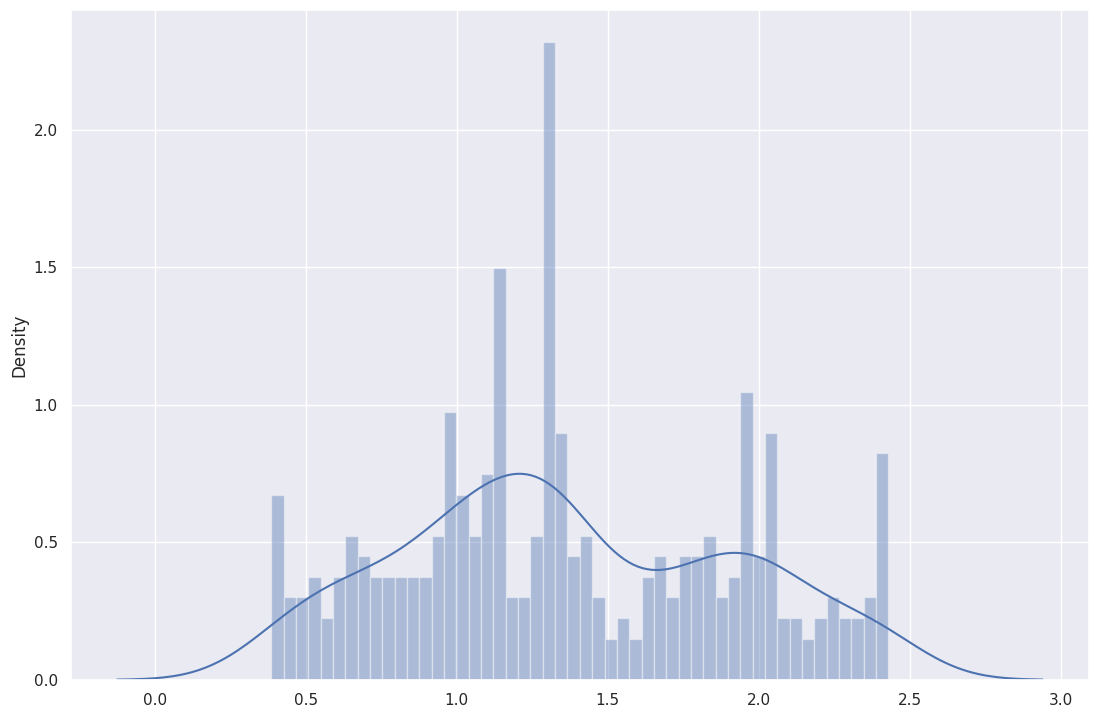

In [79]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

sns.distplot(test_mae_loss, bins=50, kde=True);

### Detect Anomalies in the S&P 500 Index Data (3 points)

* Predict the data and calculate the loss
* Define threshold and detect the anomalies

Discuss the Impact of COVID19 pandemic on stock prices in terms of anomalies detected during the pandemic period in stock prices

In [80]:
X_test_pred.shape

(327, 30, 1)

In [81]:
X_test.shape

(327, 30, 1)

In [82]:
y_test.shape

(327, 1)

In [139]:
dist = np.linalg.norm(X_test_pred- X_test, axis=1)
scores = dist.copy()
print(' Score: ',scores.shape)
scores.sort()

cut_off= int (0.80 * len(scores));

print ( 'Cutoff value: ' ,cut_off) ;
threshold = scores[cut_off] ;
print ( 'Threshold value: ' ,threshold) ;

 Score:  (327, 1)
Cutoff value:  261
Threshold value:  [9.72041153]


In [127]:
# dist = np.linalg.norm(X_test_pred[:, :, 0]- y_test, axis=1)
# scores = dist.copy()
# print(' Score: ',scores.shape)
# scores.sort()

# cut_off= int (0.80 * len(scores));

# print ( 'Cutoff value: ' ,cut_off) ;
# threshold = scores[cut_off] ;
# print ( 'Threshold value: ' ,threshold) ;

 Score:  (327,)
Cutoff value:  261
Threshold value:  10.221076165424487


In [130]:
first_column = X_test_pred[:, :, 0]
first_column

array([[0.910214  , 1.569533  , 2.020118  , ..., 2.772484  , 2.7721527 ,
        2.7718716 ],
       [0.91173536, 1.5721108 , 2.0233572 , ..., 2.7773352 , 2.777006  ,
        2.776727  ],
       [0.9128486 , 1.5739809 , 2.0256948 , ..., 2.780794  , 2.7804663 ,
        2.7801888 ],
       ...,
       [1.0081694 , 1.7338711 , 2.2247636 , ..., 3.0714562 , 3.071273  ,
        3.071117  ],
       [1.0085528 , 1.734521  , 2.2255769 , ..., 3.0726483 , 3.0724657 ,
        3.0723102 ],
       [1.0088614 , 1.7350427 , 2.2262294 , ..., 3.0735977 , 3.073415  ,
        3.0732598 ]], dtype=float32)

In [104]:
y_test

array([[3.72093313],
       [3.72918984],
       [3.71588839],
       [3.74050258],
       [3.7192525 ],
       [3.66620074],
       [3.49710908],
       [3.34773853],
       [3.33015731],
       [3.11626965],
       [3.09715946],
       [3.29331137],
       [3.15800771],
       [3.35094908],
       [3.19194785],
       [3.11550517],
       [2.76035154],
       [2.97729618],
       [2.76233882],
       [2.36101308],
       [2.68528474],
       [2.23472942],
       [2.43271648],
       [2.23702264],
       [2.24481985],
       [2.08635992],
       [1.99639573],
       [2.30704111],
       [2.36301901],
       [2.58462351],
       [2.46497814],
       [2.5915431 ],
       [2.53156744],
       [2.35317663],
       [2.44052637],
       [2.38454895],
       [2.64090782],
       [2.64506082],
       [2.78192933],
       [2.84605797],
       [2.80699608],
       [2.93202322],
       [2.839291  ],
       [2.85989858],
       [2.97585189],
       [2.89819072],
       [2.76670423],
       [2.859

In [87]:
scores

array([[ 4.67904729],
       [ 4.70695391],
       [ 4.73542081],
       [ 4.74161066],
       [ 4.77039726],
       [ 4.79507434],
       [ 4.83316525],
       [ 4.86650324],
       [ 4.89032101],
       [ 4.93923658],
       [ 4.97447987],
       [ 5.03367033],
       [ 5.09336498],
       [ 5.09748945],
       [ 5.09097255],
       [ 5.0632065 ],
       [ 5.03452367],
       [ 5.00346793],
       [ 5.04511902],
       [ 5.0820902 ],
       [ 5.11585068],
       [ 5.25264062],
       [ 5.26749658],
       [ 5.4364649 ],
       [ 5.5215456 ],
       [ 5.6111177 ],
       [ 5.65049268],
       [ 5.70778288],
       [ 5.78696143],
       [ 5.71229722],
       [ 5.59549575],
       [ 5.39588305],
       [ 5.22152497],
       [ 5.01119784],
       [ 4.81058724],
       [ 4.61141836],
       [ 4.36402481],
       [ 4.09789486],
       [ 3.8435421 ],
       [ 3.65378519],
       [ 3.43465204],
       [ 3.3648818 ],
       [ 3.34833011],
       [ 3.20113363],
       [ 3.15439017],
       [ 2

In [ ]:
X_test_pred

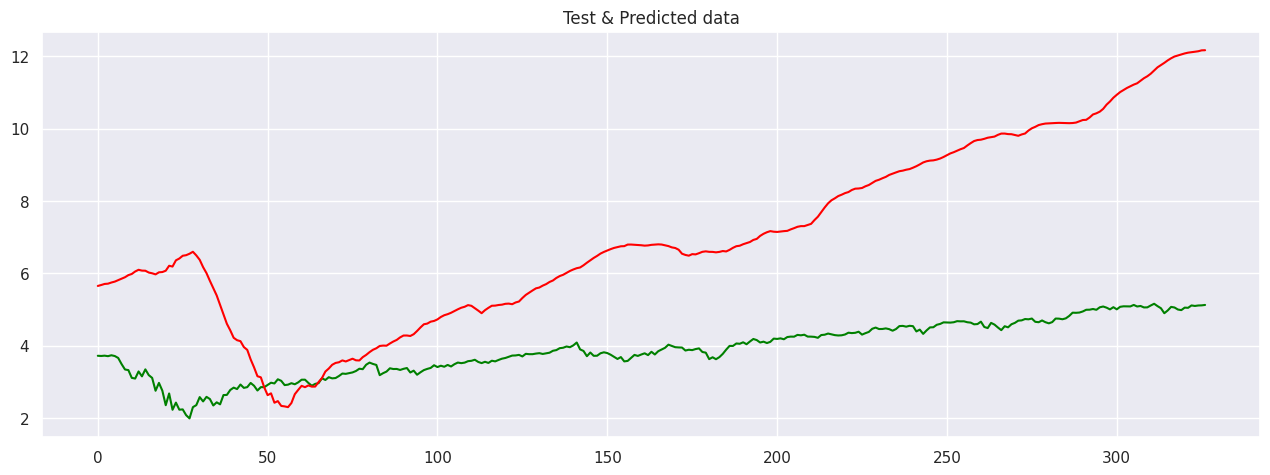

In [140]:
plt.figure(figsize= (14, 5))
plt.plot(y_test,color='green' )
plt.plot(scores, color = 'red')
plt.title("Test & Predicted data")
plt.show()

### Report Analysis

* Discuss on the results of T-SNE and PCA
* Dicuss about the results of LSTM autoencoder